Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR
### Adaptado por: Vitor Hugo Dias Santos
#### Sistemas de Informa√ß√£o - UFMG

lucas.ferro.2000@hotmail.com

vhugosantos@gmail.com

#Tokeniza√ß√£o e normaliza√ß√£o do corpus

In [32]:
# prompt: converta um arquivo pdf em txt padr√£o utf-8

%pip install PyPDF2

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = 'PDF/Isaac Asimov - Eu, Rob√¥.pdf'  # Replace with your PDF file path
txt_file_path = 'output.txt'      # Replace with desired output file path

convert_pdf_to_txt(pdf_file_path, txt_file_path)


Note: you may need to restart the kernel to use updated packages.
PDF 'PDF/Isaac Asimov - Eu, Rob√¥.pdf' converted to 'output.txt' successfully.


In [33]:
# Instala√ß√£o do NLTK
%pip install nltk==3.6.2

Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip install pandas nltk matplotlib wordcloud Pillow


Note: you may need to restart the kernel to use updated packages.


In [35]:
# Importa√ß√£o de bibliotecas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/vhugosantos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# pd.set_option('max_columns', None)
# pd.set_option('max_colwidth', None)

In [37]:
# Pega todas as pontua√ß√µes
remove_pt = string.punctuation
remove_pt + "‚Ä¢"
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# Baixa as stopwords para o portugu√™s no NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vhugosantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'at√©',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estiv√©ramos',
 'estiv√©ssemos',
 'estou',
 'est√°',
 'est√°vamos',
 'est√£o',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'f√¥ramos',
 'f√¥ssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houver√°',
 'houver√£o',

In [39]:
stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'at√©',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estiv√©ramos',
 'estiv√©ssemos',
 'estou',
 'est√°',
 'est√°vamos',
 'est√£o',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'f√¥ramos',
 'f√¥ssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houver√°',
 'h

In [40]:
stop_words_pt.add('ainda')
stop_words_pt.add('por√©m')
stop_words_pt

{'a',
 'ainda',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'at√©',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estiv√©ramos',
 'estiv√©ssemos',
 'estou',
 'est√°',
 'est√°vamos',
 'est√£o',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'f√¥ramos',
 'f√¥ssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houv

In [41]:
PATH = 'output.txt'

In [42]:
with open(PATH , 'r', encoding='utf8') as f:
    filecontent = f.read()

print(filecontent[0:])

Eu, Rob√¥ Isaac Asimov ‚ÄúPara John W. Campbell, Jr., que apadrinhou os rob√¥s.‚Äù Tradu√ß√£o de Luiz Hor√°cio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das √∫ltimas d√©cadas, tanto para cientistas como para leitores de fic√ß√£o-cient√≠fica. Escritor de enorme talento e assaz prol√≠fico, ostenta um impressionante recorde de mais de cinq√ºenta sucessos liter√°rios no dom√≠nio da fic√ß√£o e da n√£o fic√ß√£o, incluindo a famosa s√©rie ‚ÄúFunda√ß√£o‚Äù. Nascido na R√∫ssia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioqu√≠mica na Escola de Medicina da Universidade de Boston. Em 1958, deixou este cargo para se dedicar inteiramente √† sua atividade de escritor. Sobre a digitaliza√ß√£o desta obra: Se os livros tivessem pre√ßos acess√≠veis, todos poderiam compr√°-los. A digitaliza√ß√£o desta obra √© um protesto contra a exclus√£o cultural, e por conseq√º√™ncia social, causada pelos pre√ßos abusivos dos 

In [43]:
type(filecontent)

str

In [44]:
len(filecontent) # n√∫mero de tokens

443381

## Transformando o texto completo em senten√ßas (tokenizer do NLTK)

In [45]:
sentencas = []
for sentence in sent_tokenize(filecontent, language = 'portuguese'):
    sentencas.append(sentence)

In [46]:
index = 1
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: Eu, Rob√¥ Isaac Asimov ‚ÄúPara John W. Campbell, Jr., que apadrinhou os rob√¥s.‚Äù Tradu√ß√£o de Luiz Hor√°cio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das √∫ltimas d√©cadas, tanto para cientistas como para leitores de fic√ß√£o-cient√≠fica.
2: Escritor de enorme talento e assaz prol√≠fico, ostenta um impressionante recorde de mais de cinq√ºenta sucessos liter√°rios no dom√≠nio da fic√ß√£o e da n√£o fic√ß√£o, incluindo a famosa s√©rie ‚ÄúFunda√ß√£o‚Äù.
3: Nascido na R√∫ssia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioqu√≠mica na Escola de Medicina da Universidade de Boston.
4: Em 1958, deixou este cargo para se dedicar inteiramente √† sua atividade de escritor.
5: Sobre a digitaliza√ß√£o desta obra: Se os livros tivessem pre√ßos acess√≠veis, todos poderiam compr√°-los.
6: A digitaliza√ß√£o desta obra √© um protesto contra a exclus√£o cultural, e por conseq√º√™ncia social, causada pelos pre

## Segmenta√ß√£o por quebra de linha e depois pelo tokenizer do NLTK

In [47]:
sentencas_linha = []
for sentence in filecontent.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

In [48]:
sentencas_linha[0:10]

['Eu, Rob√¥ Isaac Asimov ‚ÄúPara John W. Campbell, Jr., que apadrinhou os rob√¥s.‚Äù Tradu√ß√£o de Luiz Hor√°cio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das √∫ltimas d√©cadas, tanto para cientistas como para leitores de fic√ß√£o-cient√≠fica.',
 'Escritor de enorme talento e assaz prol√≠fico, ostenta um impressionante recorde de mais de cinq√ºenta sucessos liter√°rios no dom√≠nio da fic√ß√£o e da n√£o fic√ß√£o, incluindo a famosa s√©rie ‚ÄúFunda√ß√£o‚Äù.',
 'Nascido na R√∫ssia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioqu√≠mica na Escola de Medicina da Universidade de Boston.',
 'Em 1958, deixou este cargo para se dedicar inteiramente √† sua atividade de escritor.',
 'Sobre a digitaliza√ß√£o desta obra: Se os livros tivessem pre√ßos acess√≠veis, todos poderiam compr√°-los.',
 'A digitaliza√ß√£o desta obra √© um protesto contra a exclus√£o cultural, e por conseq√º√™ncia social, causada pelos

In [49]:
index = 1
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: Eu, Rob√¥ Isaac Asimov ‚ÄúPara John W. Campbell, Jr., que apadrinhou os rob√¥s.‚Äù Tradu√ß√£o de Luiz Hor√°cio da Matta Sobre o autor: O nome deste autor tornou-se familiar no decorrer das √∫ltimas d√©cadas, tanto para cientistas como para leitores de fic√ß√£o-cient√≠fica.
2: Escritor de enorme talento e assaz prol√≠fico, ostenta um impressionante recorde de mais de cinq√ºenta sucessos liter√°rios no dom√≠nio da fic√ß√£o e da n√£o fic√ß√£o, incluindo a famosa s√©rie ‚ÄúFunda√ß√£o‚Äù.
3: Nascido na R√∫ssia, o Dr. Asimov estudou na Universidade de Columbia, onde se graduou em 1948; foi professor assistente de Bioqu√≠mica na Escola de Medicina da Universidade de Boston.
4: Em 1958, deixou este cargo para se dedicar inteiramente √† sua atividade de escritor.
5: Sobre a digitaliza√ß√£o desta obra: Se os livros tivessem pre√ßos acess√≠veis, todos poderiam compr√°-los.
6: A digitaliza√ß√£o desta obra √© um protesto contra a exclus√£o cultural, e por conseq√º√™ncia social, causada pelos pre

## Tokeniza√ß√£o de cada senten√ßa em palavras (tokenizer do NLTK)





In [50]:
sentencas_tokenizadas = []

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)
index = 1
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {tokens}')
    index+=1

1: ['Eu', ',', 'Rob√¥', 'Isaac', 'Asimov', '‚Äú', 'Para', 'John', 'W.', 'Campbell', ',', 'Jr.', ',', 'que', 'apadrinhou', 'os', 'rob√¥s.', '‚Äù', 'Tradu√ß√£o', 'de', 'Luiz', 'Hor√°cio', 'da', 'Matta', 'Sobre', 'o', 'autor', ':', 'O', 'nome', 'deste', 'autor', 'tornou-se', 'familiar', 'no', 'decorrer', 'das', '√∫ltimas', 'd√©cadas', ',', 'tanto', 'para', 'cientistas', 'como', 'para', 'leitores', 'de', 'fic√ß√£o-cient√≠fica', '.']
2: ['Escritor', 'de', 'enorme', 'talento', 'e', 'assaz', 'prol√≠fico', ',', 'ostenta', 'um', 'impressionante', 'recorde', 'de', 'mais', 'de', 'cinq√ºenta', 'sucessos', 'liter√°rios', 'no', 'dom√≠nio', 'da', 'fic√ß√£o', 'e', 'da', 'n√£o', 'fic√ß√£o', ',', 'incluindo', 'a', 'famosa', 's√©rie', '‚Äú', 'Funda√ß√£o', '‚Äù', '.']
3: ['Nascido', 'na', 'R√∫ssia', ',', 'o', 'Dr.', 'Asimov', 'estudou', 'na', 'Universidade', 'de', 'Columbia', ',', 'onde', 'se', 'graduou', 'em', '1948', ';', 'foi', 'professor', 'assistente', 'de', 'Bioqu√≠mica', 'na', 'Escola', 'de', 'Medi

## Pre-processamento dos elementos tokenizados
A ideia aqui √© retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em min√∫sculos, retirar espa√ßos e quebras de linhas adicionais desnecess√°rios.

In [51]:
from typing import TextIO
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt+'‚Äì'+'üôÅ'+'\‚Äô'+'\‚Äù'+"‚Äú"+"‚Ä¢") for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)

index = 1
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {texto}')
    index+=1


1: rob√¥ isaac asimov john w campbell jr apadrinhou rob√¥s tradu√ß√£o luiz hor√°cio matta sobre autor nome deste autor tornouse familiar decorrer √∫ltimas d√©cadas tanto cientistas leitores fic√ß√£ocient√≠fica
2: escritor enorme talento assaz prol√≠fico ostenta impressionante recorde cinq√ºenta sucessos liter√°rios dom√≠nio fic√ß√£o fic√ß√£o incluindo famosa s√©rie funda√ß√£o
3: nascido r√∫ssia dr asimov estudou universidade columbia onde graduou professor assistente bioqu√≠mica escola medicina universidade boston
4: deixou cargo dedicar inteiramente atividade escritor
5: sobre digitaliza√ß√£o desta obra livros pre√ßos acess√≠veis todos poderiam compr√°los
6: digitaliza√ß√£o desta obra protesto contra exclus√£o cultural conseq√º√™ncia social causada pre√ßos abusivos livros editados publicados brasil
7: assim totalmente conden√°vel venda deste elivro qualquer circunst√¢ncia
8: homenagem molly millions peter pan viaje outras terras pagar ped√°gio
9: √≠ndice introdu√ß√£o
10: robbie
11: br

#NGramas

In [52]:
len(sent_tokenizada_preprocessed)

6764

In [55]:
import os
ngram_value = 1 #muda o tamanho do engrama
most_common_value = 100

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
index = 1
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: [('rob√¥',), ('isaac',), ('asimov',), ('john',), ('w',), ('campbell',), ('jr',), ('apadrinhou',), ('rob√¥s',), ('tradu√ß√£o',), ('luiz',), ('hor√°cio',), ('matta',), ('sobre',), ('autor',), ('nome',), ('deste',), ('autor',), ('tornouse',), ('familiar',), ('decorrer',), ('√∫ltimas',), ('d√©cadas',), ('tanto',), ('cientistas',), ('leitores',), ('fic√ß√£ocient√≠fica',)]
2: [('escritor',), ('enorme',), ('talento',), ('assaz',), ('prol√≠fico',), ('ostenta',), ('impressionante',), ('recorde',), ('cinq√ºenta',), ('sucessos',), ('liter√°rios',), ('dom√≠nio',), ('fic√ß√£o',), ('fic√ß√£o',), ('incluindo',), ('famosa',), ('s√©rie',), ('funda√ß√£o',)]
3: [('nascido',), ('r√∫ssia',), ('dr',), ('asimov',), ('estudou',), ('universidade',), ('columbia',), ('onde',), ('graduou',), ('professor',), ('assistente',), ('bioqu√≠mica',), ('escola',), ('medicina',), ('universidade',), ('boston',)]
4: [('deixou',), ('cargo',), ('dedicar',), ('inteiramente',), ('atividade',), ('escritor',)]
5: [('sobre',), ('

In [56]:
index = 1
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: ('rob√¥',)
2: ('isaac',)
3: ('asimov',)
4: ('john',)
5: ('w',)
6: ('campbell',)
7: ('jr',)
8: ('apadrinhou',)
9: ('rob√¥s',)
10: ('tradu√ß√£o',)
11: ('luiz',)
12: ('hor√°cio',)
13: ('matta',)
14: ('sobre',)
15: ('autor',)
16: ('nome',)
17: ('deste',)
18: ('autor',)
19: ('tornouse',)
20: ('familiar',)
21: ('decorrer',)
22: ('√∫ltimas',)
23: ('d√©cadas',)
24: ('tanto',)
25: ('cientistas',)
26: ('leitores',)
27: ('fic√ß√£ocient√≠fica',)
28: ('escritor',)
29: ('enorme',)
30: ('talento',)
31: ('assaz',)
32: ('prol√≠fico',)
33: ('ostenta',)
34: ('impressionante',)
35: ('recorde',)
36: ('cinq√ºenta',)
37: ('sucessos',)
38: ('liter√°rios',)
39: ('dom√≠nio',)
40: ('fic√ß√£o',)
41: ('fic√ß√£o',)
42: ('incluindo',)
43: ('famosa',)
44: ('s√©rie',)
45: ('funda√ß√£o',)
46: ('nascido',)
47: ('r√∫ssia',)
48: ('dr',)
49: ('asimov',)
50: ('estudou',)
51: ('universidade',)
52: ('columbia',)
53: ('onde',)
54: ('graduou',)
55: ('professor',)
56: ('assistente',)
57: ('bioqu√≠mica',)
58: ('escola',)
59: (

In [57]:
len(ngram_list)

9818

In [58]:
common

[(('rob√¥',), 353),
 (('rob√¥s',), 313),
 (('powell',), 290),
 (('donovan',), 263),
 (('bem',), 256),
 (('calvin',), 183),
 (('susan',), 178),
 (('disse',), 167),
 (('tudo',), 140),
 (('pode',), 135),
 (('lanning',), 134),
 (('senhor',), 131),
 (('ent√£o',), 129),
 (('apenas',), 122),
 (('c√©rebro',), 121),
 (('byerley',), 121),
 (('agora',), 119),
 (('dois',), 118),
 (('bogert',), 112),
 (('olhos',), 109),
 (('voz',), 101),
 (('robbie',), 99),
 (('todos',), 97),
 (('vez',), 97),
 (('coisa',), 96),
 (('m√°quina',), 94),
 (('qualquer',), 92),
 (('gloria',), 89),
 (('sim',), 89),
 (('homem',), 88),
 (('modo',), 87),
 (('fazer',), 86),
 (('sabe',), 86),
 (('aqui',), 86),
 (('homens',), 85),
 (('assim',), 81),
 (('antes',), 81),
 (('tempo',), 81),
 (('sobre',), 79),
 (('t√£o',), 79),
 (('cabe√ßa',), 78),
 (('lado',), 77),
 (('outro',), 77),
 (('primeira',), 76),
 (('nada',), 76),
 (('onde',), 74),
 (('replicou',), 74),
 (('deve',), 73),
 (('vamos',), 72),
 (('talvez',), 72),
 (('herbie',),

In [59]:
df_common.head(30)

Ngram  Count
0       (rob√¥,)    353
1      (rob√¥s,)    313
2     (powell,)    290
3    (donovan,)    263
4        (bem,)    256
5     (calvin,)    183
6      (susan,)    178
7      (disse,)    167
8       (tudo,)    140
9       (pode,)    135
10   (lanning,)    134
11    (senhor,)    131
12     (ent√£o,)    129
13    (apenas,)    122
14   (c√©rebro,)    121
15   (byerley,)    121
16     (agora,)    119
17      (dois,)    118
18    (bogert,)    112
19     (olhos,)    109
20       (voz,)    101
21    (robbie,)     99
22     (todos,)     97
23       (vez,)     97
24     (coisa,)     96
25   (m√°quina,)     94
26  (qualquer,)     92
27    (gloria,)     89
28       (sim,)     89
29     (homem,)     88

In [60]:
# Quantidade de palavras
len(flat_ngram_counts)

40674

In [61]:
# Quantidade de palavras √∫nicas
len(ngram_list)

9818

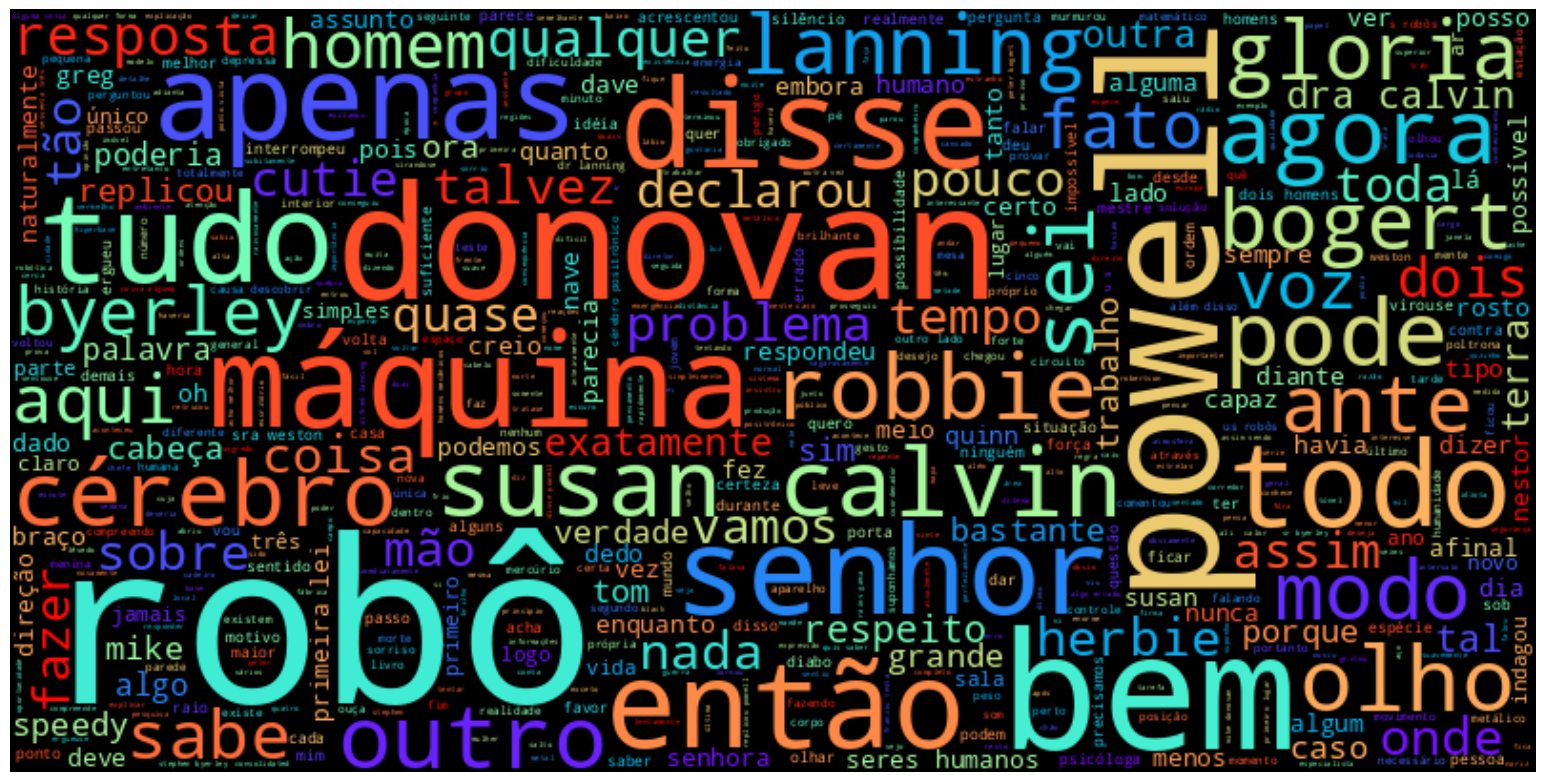

In [68]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'rainbow'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 120, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

In [30]:
%pip install PyPDF2


Note: you may need to restart the kernel to use updated packages.


fazer a frequencia, Carlos

In [31]:
# prompt: leia um arquivo pdf e gere um txt com utf8

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace with your file paths):
pdf_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf'
txt_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.txt'

convert_pdf_to_txt(pdf_file_path, txt_file_path)


Error: File '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf' not found.


In [32]:
# prompt: coloque cada p√°gina do pdf num arquivo txt assinumeroado pagina001.txt, pagina002.txt etc. dentro de um diretorio.

import os
import PyPDF2

def split_pdf_to_txt_files(pdf_path, output_dir):
    """Splits a PDF file into individual text files, one per page."""

    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            num_pages = len(pdf_reader.pages)

            # Create the output directory if it doesn't exist
            os.makedirs(output_dir, exist_ok=True)

            for page_num in range(num_pages):
                page = pdf_reader.pages[page_num]
                text = page.extract_text()

                # Format the filename with leading zeros
                filename = os.path.join(output_dir, f"pagina{page_num + 1:03d}.txt")

                with open(filename, 'w', encoding='utf-8') as txt_file:
                    txt_file.write(text)

            print(f"PDF '{pdf_path}' split into text files in '{output_dir}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf'
output_directory = '/content/pdf_pages'  # Directory to save the text files
split_pdf_to_txt_files(pdf_file_path, output_directory)


Error: File '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf' not found.


In [33]:
!tar -czvf /content/pdf_pages.tgz /content/pdf_pages/

tar: Removendo "/" inicial dos nomes dos membros
tar: /content/pdf_pages: Fun√ß√£o stat falhou: Arquivo ou diret√≥rio inexistente
tar (child): /content/pdf_pages.tgz: Fun√ß√£o open falhou: Arquivo ou diret√≥rio inexistente
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
